# Exploratory Data Analysis

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data = pd.read_csv('superconduct/train.csv')   # Read the CSV file into a Pandas Dataframe
data.head()   # Peak into the first 5 rows of the dataset

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [94]:
data.shape    # Shape (rows, columns) of the dataset

(21263, 82)

In [95]:
data.info()   # Information about the columns of the dataset - name, datatype, count of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [96]:
# Does this dataset have any missing values?

if(data.isnull().values.any() == True):
  print("This dataset has some missing values which need to be handled")
  data = data.dropna()  # Rows with missing values (if any) are dropped

else:
  print("This dataset has no missing values. No action required.")

This dataset has no missing values. No action required.


In [97]:
# Does this dataset have any duplicate rows?

if(data.duplicated().values.any() == True):
  ndup = data[data.duplicated()].shape[0]
  print(f"This dataset has {ndup} duplicated rows")
  data = data.drop_duplicates()  # Rows with duplicate values (if any) are dropped
  print("\nThe duplicate rows have been dropped from the dataset now")

else:
  print("This dataset has no duplicated rows. No action required")



This dataset has 66 duplicated rows

The duplicate rows have been dropped from the dataset now


In [98]:
# Dataset shape after handling missing values and duplicates
data.shape

(21197, 82)

In [99]:
data.describe()     # Gives a descriptive statistical summary of the data columns

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,...,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000
mean,4.120300,87.544201,72.945331,71.253164,58.474874,1.166782,1.065103,115.751945,33.204053,44.436401,...,3.148856,3.052542,3.051485,1.297020,1.053977,2.042553,1.480890,0.839692,0.674168,34.494532
std,1.438282,29.643136,33.460789,30.990774,36.615381,0.364712,0.401225,54.584784,26.966285,20.019732,...,1.189878,1.044637,1.173221,0.392834,0.380121,1.243242,0.977545,0.485002,0.456038,34.276465
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.522475,52.143839,58.041225,35.247208,0.972995,0.781227,78.899680,16.799962,32.890369,...,2.116279,2.267933,2.090896,1.060857,0.778998,1.000000,0.921250,0.451754,0.306892,5.380000
50%,4.000000,84.922750,60.689236,66.361592,39.873869,1.199541,1.148465,122.906070,26.601500,45.123500,...,2.605455,2.615321,2.428047,1.368922,1.169665,2.000000,1.062857,0.800000,0.500000,20.000000
75%,5.000000,100.374260,85.982703,78.019689,73.056021,1.444537,1.360388,154.119320,38.336200,59.356406,...,4.007317,3.662842,3.909523,1.589027,1.331531,3.000000,1.910400,1.200000,1.021023,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


# Dataset Preparation

Preparing various input datasets for experiments:

1) Regular dataset: X
2) Standardised dataset: X_std
3) PCA Reduced dataset: X_pca

In [100]:
# 1) Regular Dataset

X = data.drop('critical_temp', axis=1)  # Stores the input attributes data
y = data['critical_temp']               # Stores the target variable data 

# Import Scikit-Learn's train_test_split to split the data into 80% training and 20% testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inspecting the shape of the dataset and taking a peak into it
print(f"\nNumber of samples and attributes of X: {X.shape}\n")
X.head()


Number of samples and attributes of X: (21197, 81)



,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [101]:
# 2) Standardized Dataset

# Standardizing the data subtracts the mean and scales the values to unit standard deviation
# It is applied to the input data to bring values to a standard range.

# Using the StandardScaler class to transform the regular data to Standardized data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X))

# Using train_test_split to create a new split for the Standardized input data
X_train_std, X_test_std = train_test_split(X_std, test_size=0.2, random_state=42)

# Inspecting the shape of the dataset after Standardization and taking a peak into it
print(f"\nNumber of samples and attributes of X after standardization: {X_std.shape}\n")
X_std.head()


Number of samples and attributes of X after standardization: (21197, 81)



,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-0.083643,0.047239,-0.450766,-0.157843,-0.610639,0.041164,-0.006747,0.131068,-0.052257,0.376259,...,-0.905294,-0.749433,-0.803339,-0.708921,0.183039,0.032211,-0.838596,-0.404263,-0.83853,-0.519945
1,0.611647,0.174919,-0.431169,0.060653,-0.602992,0.774676,-0.018313,0.131068,0.109691,0.132784,...,-1.144934,-0.749433,-1.114640,-0.716681,0.662110,-0.017774,-0.034228,-0.360420,-0.42730,-0.450766
2,-0.083643,0.047239,-0.450092,-0.157843,-0.610478,0.041164,-0.222130,0.131068,0.094084,0.376259,...,-0.905294,-0.737427,-0.803339,-0.697929,0.183039,-0.065251,-0.838596,-0.375034,-0.83853,-0.503197
3,-0.083643,0.047239,-0.450429,-0.157843,-0.610559,0.041164,-0.106705,0.131068,0.020914,0.376259,...,-0.905294,-0.743430,-0.803339,-0.703433,0.183039,-0.013531,-0.838596,-0.389649,-0.83853,-0.511408
4,-0.083643,0.047239,-0.451440,-0.157843,-0.610800,0.041164,0.159817,0.131068,-0.198597,0.376259,...,-0.905294,-0.761440,-0.803339,-0.719849,0.183039,0.110690,-0.838596,-0.433491,-0.83853,-0.538035


In [102]:
# 3) PCA Reduced Dataset

# Principal Component Analysis reduces the data by finding the directions of maximum variance and projecting the data along those directions, 
# thus preserving information of the original attributes and reducing the size of the dataset for better computations and visualisations.

# Using PCA class to reduce dimensionality of the data from 81 to n
from sklearn.decomposition import PCA
pca_n = PCA(n_components=20)
X_pca = pd.DataFrame(pca_n.fit_transform(X_std))

X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

print(f'Number of samples and attributes of X after PCA reduction: {X_pca.shape}')
X_pca.head()

Number of samples and attributes of X after PCA reduction: (21197, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.646900,0.999713,3.051826,1.697892,0.249161,-0.207807,0.447670,-0.217387,-0.388266,0.232477,0.626102,0.152939,-0.520054,-0.020863,-0.249813,0.734151,0.269041,-0.244249,-0.144469,-0.345779
1,-4.537828,-0.211469,1.729489,1.103595,0.983089,-1.008009,-0.262750,0.214778,0.394048,-1.123153,1.078819,0.567011,-0.596331,-0.114212,-0.811667,1.206177,1.001846,-0.395515,0.427897,0.043724
2,-3.470397,1.063127,3.137686,1.795432,0.299784,-0.215807,0.481511,0.013319,-0.501370,0.194463,0.731621,0.145086,-0.565013,-0.024622,-0.275989,0.763321,0.312015,-0.150216,-0.122054,-0.354943
3,-3.563606,1.028157,3.091372,1.744885,0.273785,-0.212743,0.463094,-0.105911,-0.443552,0.212919,0.677923,0.149350,-0.541774,-0.022839,-0.262529,0.749098,0.288904,-0.199114,-0.134429,-0.350031
4,-3.792247,0.956488,2.987667,1.611754,0.202485,-0.193701,0.423214,-0.423932,-0.282919,0.273499,0.526737,0.158674,-0.480052,-0.016526,-0.226484,0.702872,0.235802,-0.325804,-0.159991,-0.338072


# Dimensionality Reduction & Data Visualisation

## Principal Component Analysis (PCA)

Principal Component Analysis reduces the data by finding the directions of maximum variance and projecting the data along those directions, thus preserving information of the original attributes and also reducing the size of the dataset for better computations and visualisations.

In [103]:
# Here, we reduce the dimensions of the input data from 81 to 2 so that it can be visualised in 3D

from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
X_2D_pca = pca2.fit_transform(X_std)

print(f'\nPCA Features: Number of samples and attributes: {X_2D_pca.shape}')


PCA Features: Number of samples and attributes: (21197, 2)


In [104]:
# Visualising the 3D point cloud of the PCA reduced dataset against the target variable 'Critical Temperature'

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_2D_pca[:, 0], X_2D_pca[:, 1], y, alpha=0.35);
ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Critical Temp")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Critical Temp')

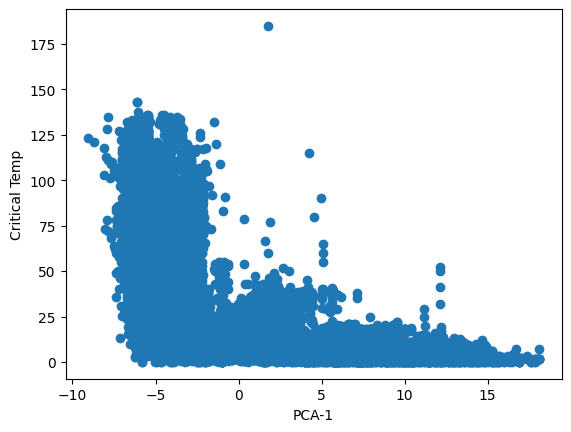

In [ ]:
# Visualising the 2D point cloud of the PCA-1 feature against the target variable 'Critical Temperature'
plt.scatter(X_2D_pca[:, 0], y, alpha=0.35)
plt.xlabel("PCA-1")
plt.ylabel("Critical Temp")

Text(0, 0.5, 'Critical Temp')

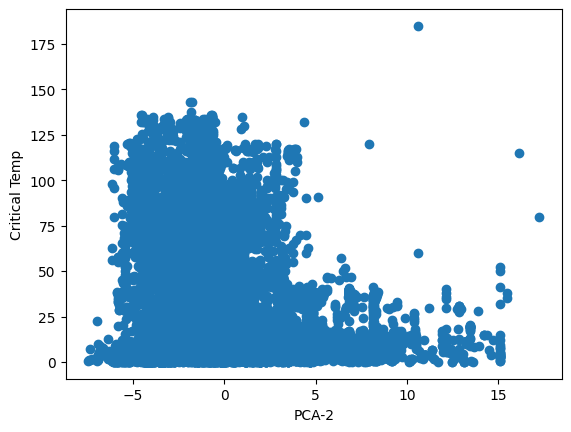

In [ ]:
# Visualising the 2D point cloud of the PCA-2 feature against the target variable 'Critical Temperature'
plt.scatter(X_2D_pca[:, 1], y, alpha=0.35)
plt.xlabel("PCA-2")
plt.ylabel("Critical Temp")

## t-Distributed Stochastic Neighbour Embedding (t-SNE)

One line description about how tSNE works

In [ ]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, init='pca', learning_rate='auto')
X_2D_tsne = tsne2.fit_transform(X_pca)
print(f'tSNE Embedding: Number of samples and attributes: {X_2D_tsne.shape}')

tSNE Embedding: Number of samples and attributes: (21197, 2)


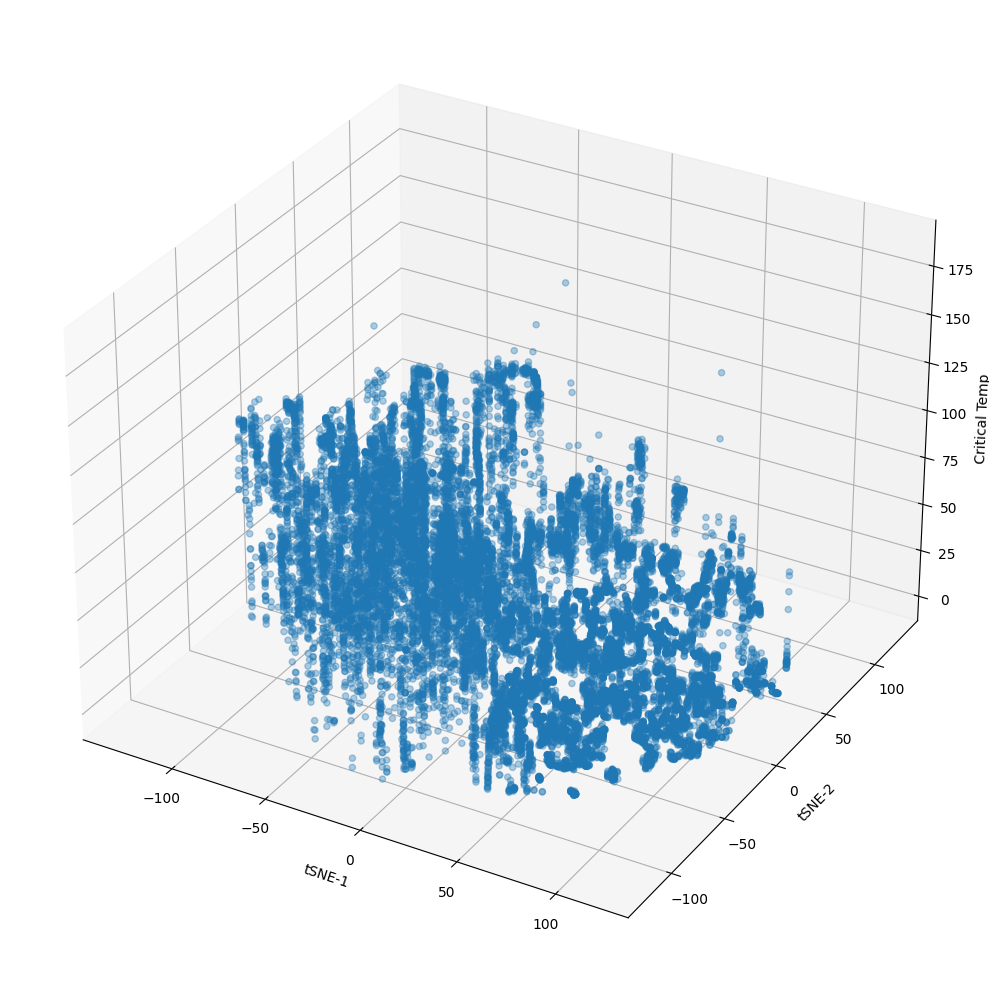

In [ ]:
# Visualising the 3D point cloud of the tSNE reduced dataset against the target variable 'Critical Temperature'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_2D_tsne[:, 0], X_2D_tsne[:, 1], y, alpha=0.35);
ax.set_xlabel("tSNE-1")
ax.set_ylabel("tSNE-2")
ax.set_zlabel("Critical Temp")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Critical Temp')

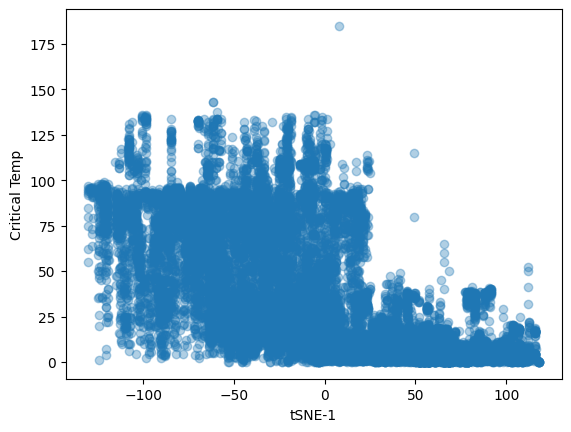

In [ ]:
# Visualising the 2D point cloud of the tSNE-1 feature against the target variable 'Critical Temperature'
plt.scatter(X_2D_tsne[:, 0], y, alpha=0.35)
plt.xlabel("tSNE-1")
plt.ylabel("Critical Temp")

Text(0, 0.5, 'Critical Temp')

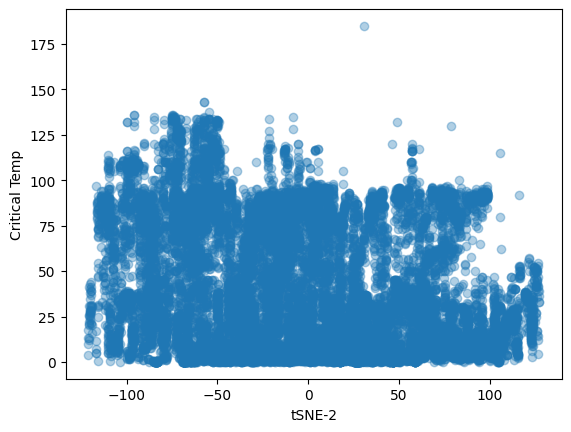

In [ ]:
# Visualising the 2D point cloud of the tSNE-2 feature against the target variable 'Critical Temperature'
plt.scatter(X_2D_tsne[:, 1], y, alpha=0.35)
plt.xlabel("tSNE-2")
plt.ylabel("Critical Temp")

# Baseline Model - Linear Regression

## Regular Data

In [ ]:
# Creating a linear regression model and fitting it to the training data

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# The model's score on the testing data
print("REGULAR DATA")
print('R2 score: ', model.score(X_test, y_test))

# # Model's intercept
# print('\nIntercept: ', model.intercept_)

# # Model's coefficients
# print('\nCoefficients: ', model.coef_)

REGULAR DATA
R2 score:  0.7353599049008341


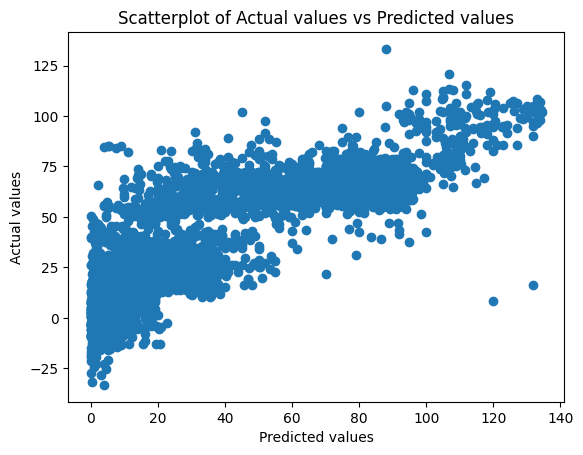

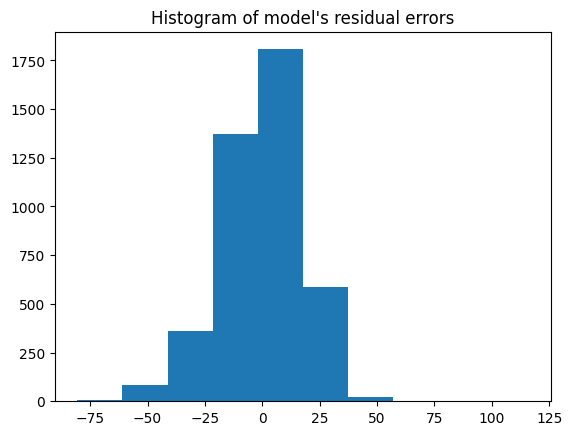

In [ ]:
# Model's predictions on the test data
y_pred = model.predict(X_test)

# Scatter plot of the model's predictions vs the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatterplot of Actual values vs Predicted values")
plt.show()
print('\n')

# Histogram of the residuals
plt.hist(y_test - y_pred)
plt.title("Histogram of model's residual errors")
plt.show()

In [ ]:
# Cross validation of the model using 10 folds in terms of mean +/- std

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('\n', scores.mean(), '+/-', scores.std())


 0.7337205416664884 +/- 0.0181300752242031


## Standardized Data

In [ ]:
### Linear Regression with standard scaling

# Creating a linear regression model and fitting it to the training data
model_std = LinearRegression()
model_std.fit(X_train_std, y_train)

# Model's score on the testing data
print('STANDARDIZED DATA')
print('R2 score: ', model_std.score(X_test_std, y_test))

# # Model's intercept
# print('\nIntercepts', model_std.intercept_)

# # Model's coefficients
# print('\nCoefficients: ', model_std.coef_)

STANDARDIZED DATA
R2 score:  0.735359904900787


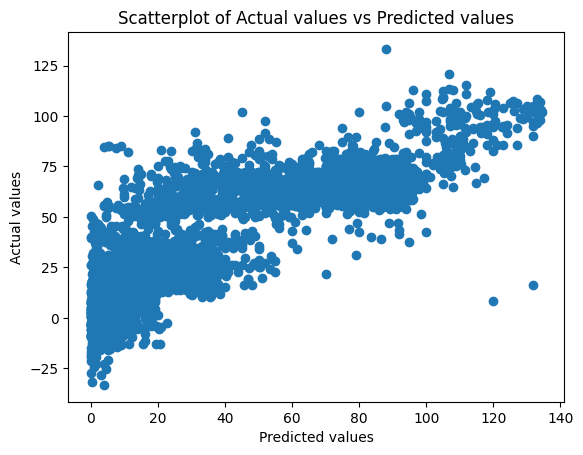

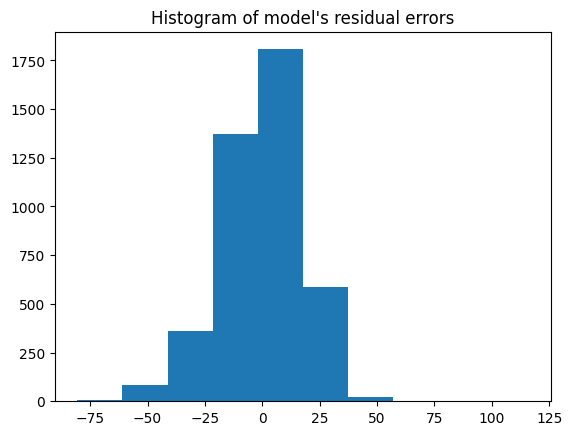

In [ ]:
# Model's predictions on the test data
y_pred_std = model_std.predict(X_test_std)

# Scatter plot of the model's predictions vs the actual values
plt.scatter(y_test, y_pred_std)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatterplot of Actual values vs Predicted values")
plt.show()
print('\n')

# Histogram of the residuals
plt.hist(y_test - y_pred_std)
plt.title("Histogram of model's residual errors")
plt.show()

In [ ]:
# Cross validation of the model using 10 folds in terms of mean +/- std

scores_std = cross_val_score(model_std, X_train_std, y_train, cv = 10)
print('\n', scores_std.mean(), '+/-', scores_std.std())

## PCA Reduced Data

In [ ]:
## Linear Regression with Dimensionality Reduction (PCA)

# Creating a linear regression model and fitting it to the training data
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Model's score on the testing data
print('PCA REDUCED DATA')
print('R2 score: ', model_pca.score(X_test_pca, y_test))

# # Model's intercept
# print('\nIntercepts', model_pca.intercept_)

# # Model's coefficients
# print('\nCoefficients: ', model_pca.coef_)

PCA REDUCED DATA
R2 score:  0.6347837920216204


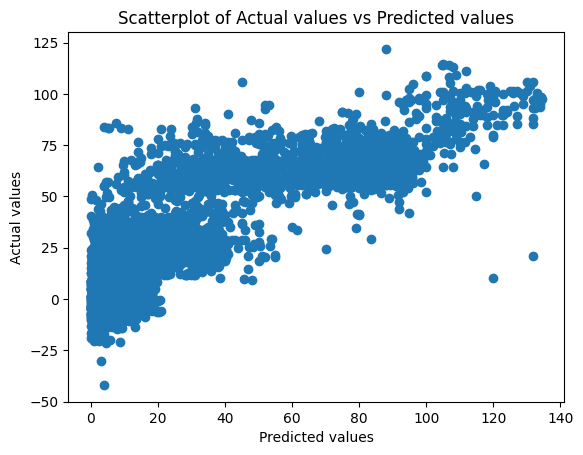

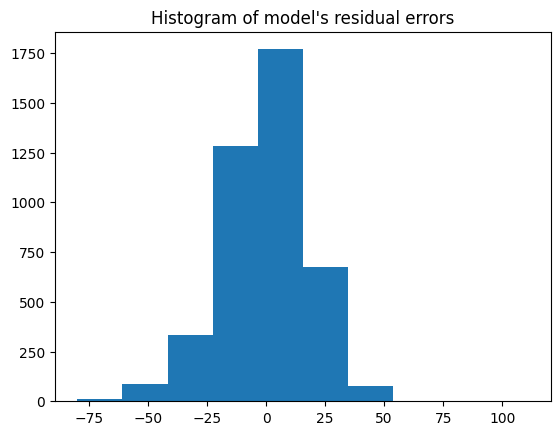

In [ ]:
# Model's predictions on the test data
y_pred_pca = model_pca.predict(X_test_pca)

# Scatter plot of the model's predictions vs the actual values
plt.scatter(y_test, y_pred_pca)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatterplot of Actual values vs Predicted values")
plt.show()
print('\n')

# Histogram of the residuals
plt.hist(y_test - y_pred_pca)
plt.title("Histogram of model's residual errors")
plt.show()

In [ ]:
# Cross validation of the model using 10 folds in terms of mean +/- std

scores_pca = cross_val_score(model_pca, X_train_pca, y_train, cv = 10)
print('\n', scores_pca.mean(), '+/-', scores_pca.std())

# Regularisation

## Regular Data

In [ ]:
# L1 regularization - LASSO

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
print('\nREGULAR DATA')
print('Lasso Score:', lasso_reg.score(X_test, y_test))


# L2 regularization - RIDGE

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X_train, y_train)
print('Ridge Score:', ridge_reg.score(X_test, y_test))


# L3 regularization - ElasticNet

from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg.fit(X_train, y_train)
print('ElasticNet score:', elastic_net_reg.score(X_test, y_test))
print('\n')

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.739e+06, tolerance: 1.991e+03
  model = cd_fast.enet_coordinate_descent(


Lasso Score: 0.723197435008853
Ridge Score: 0.7353480402427895
ElasticNet score: 0.7209268640471949


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.763e+06, tolerance: 1.991e+03
  model = cd_fast.enet_coordinate_descent(


## Standardized Data

In [ ]:
# L1 regularization - LASSO

from sklearn.linear_model import Lasso

lasso_reg_std = Lasso(alpha=0.1)
lasso_reg_std.fit(X_train_std, y_train)
print('\nSTANDARDIZED DATA')
print('Lasso Score:', lasso_reg_std.score(X_test_std, y_test))


# L2 regularization - RIDGE

from sklearn.linear_model import Ridge

ridge_reg_std = Ridge(alpha=0.1, solver="cholesky")
ridge_reg_std.fit(X_train_std, y_train)
print('Ridge Score:', ridge_reg_std.score(X_test_std, y_test))


# L3 regularization - ElasticNet

from sklearn.linear_model import ElasticNet

elastic_net_reg_std = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg_std.fit(X_train_std, y_train)
print('ElasticNet score:', elastic_net_reg_std.score(X_test_std, y_test))
print('\n')

Lasso Score: 0.7106641465387586
Ridge Score: 0.7353392469917934
ElasticNet score: 0.6981885761596057


## PCA Reduced Data

In [ ]:
# L1 regularization - LASSO

from sklearn.linear_model import Lasso

lasso_reg_pca = Lasso(alpha=0.1)
lasso_reg_pca.fit(X_train_pca, y_train)
print('\nPCA REDUCED DATA')
print('Lasso Score:', lasso_reg_pca.score(X_test_pca, y_test))


# L2 regularization - RIDGE

from sklearn.linear_model import Ridge

ridge_reg_pca = Ridge(alpha=0.1, solver="cholesky")
ridge_reg_pca.fit(X_train_pca, y_train)
print('Ridge Score:', ridge_reg_pca.score(X_test_pca, y_test))


# L3 regularization - ElasticNet

from sklearn.linear_model import ElasticNet

elastic_net_reg_pca = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg_pca.fit(X_train_pca, y_train)
print('ElasticNet score:', elastic_net_reg_pca.score(X_test_pca, y_test))
print('\n')


Lasso Score: 0.6344776156307014
Ridge Score: 0.6347837958745535
ElasticNet score: 0.6339166795307913




# Polynomial Regression

## Regular Data

In [ ]:
# Fitting and transforming the data into polynomial data

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_train_poly, X_test_poly = train_test_split(X_poly, test_size=0.2, random_state=42)

# Creating a model to fit the polynomial data

from sklearn.linear_model import LinearRegression

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# The Polynomial Regression model's score on the testing data
print('REGULAR DATA')
print('R2 score:', poly_reg.score(X_test_poly, y_test))



REGULAR DATA
R2 score: -0.12222159450534842


## Standardized Data

In [ ]:
# Fitting and transforming the Standardized data into polynomial data

poly_features_std = PolynomialFeatures(degree=2, include_bias=False)
X_poly_std = poly_features_std.fit_transform(X_std)

X_train_poly_std, X_test_poly_std = train_test_split(X_poly_std, test_size=0.2, random_state=42)

# Creating a model to fit the polynomial data
poly_reg_std = LinearRegression()
poly_reg_std.fit(X_train_poly_std, y_train)

# The Polynomial Regression model's score on the testing data
print('STANDARDIZED DATA')
print('R2 score:', poly_reg_std.score(X_test_poly_std, y_test))

STANDARDIZED DATA
R2 score: -0.12105826513057827


## PCA Reduced Data

In [ ]:
# Fitting and transforming the PCA Reduced data into polynomial data

poly_features_pca = PolynomialFeatures(degree=2, include_bias=False)
X_poly_pca = poly_features_pca.fit_transform(X_pca)

X_train_poly_pca, X_test_poly_pca = train_test_split(X_poly_pca, test_size=0.2, random_state=42)

# Creating a model to fit the polynomial data
poly_reg_pca = LinearRegression()
poly_reg_pca.fit(X_train_poly_pca, y_train)

# The Polynomial Regression model's score on the testing data
print('PCA REDUCED DATA')
print('R2 score:', poly_reg_pca.score(X_test_poly_pca, y_test))

PCA REDUCED DATA
R2 score: 0.77361694156649


# SVM Regression

## Using LinearSVR

In [ ]:
# Fitting the data into LinearSVR model

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(random_state=42)
svm_reg.fit(X_train, y_train)

# The LinearSVR model's score on the testing data
print('REGULAR DATA')
print('R2 score: ', svm_reg.score(X_test, y_test))

0.6672301850914808


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Fitting the Standardized data into LinearSVR model
svm_reg_std = LinearSVR(random_state=42)
svm_reg_std.fit(X_train_std, y_train)

# The LinearSVR model's score on the testing data
print('STANDARDIZED DATA')
print('R2 score: ', svm_reg_std.score(X_test_std, y_test))

0.7177466057993209


In [ ]:
# Fitting the PCA Reduced data into LinearSVR model
svm_reg_pca = LinearSVR(random_state=42)
svm_reg_pca.fit(X_train_pca, y_train)

# The LinearSVR model's score on the testing data
print('PCA REDUCED DATA')
print('R2 score: ', svm_reg_pca.score(X_test_pca, y_test))

0.6247624370090694


## Using SVR with kernel

Implemented on PCA Reduced dataset only - due to high computational time for datasets with more features

In [ ]:
# Fit the data into SVR model with linear kernel
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear')
svr_lin.fit(X_train_pca, y_train)

# Linear kernel SVR model's score on testing data
print('R2 score: ', svr_lin.score(X_test_pca, y_test))

0.6246441835931963

In [ ]:
# Fit the data into SVR model with 2-degree polynomial kernel
svr_poly = SVR(kernel='poly', degree=2)
svr_poly.fit(X_train_pca, y_train)

# Polynomial kernel SVR model's score on testing data
print('R2 score: ', svr_poly.score(X_test_pca, y_test))

0.48449774604567375

In [ ]:
# Fit the data into SVR model with RBF kernel
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_pca, y_train)

# RBF kernel SVR model's score on testing data
print('R2 score: ', svr_rbf.score(X_test_pca, y_test))

0.7686505491075472